In [85]:
print(gensim.__version__)

3.5.0


In [1]:
import gensim
import spacy
import pandas as pd
import smart_open
import random
import sqlite3
import logging
nlp = spacy.load('en', parser=False)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

dataframe = pd.read_csv("wendland.csv", encoding='latin1')

dataframe['overview'] = dataframe['overview'].astype(str)
dataframe = dataframe.reset_index(drop=True)
dataframe

/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frame

,historian_id,name,date_born,place_born,date_died,place_died,overview,home_country,sources,bibliography,other_names,contributor,notes,gender,subject_area,path
0,12,"Adler, Bruno",1889,"Karlsbad (also Carlsbad), Bohemia; [present da...",1968,"London, England, UK",Early friend and exponent of German Expression...,Germany,"Wendland, Ulrike. <u>Biographisches Handbuch d...",NaN,NaN,NaN,NaN,NaN,NaN,/adlerb
1,40,"Antal, Frederick",21 December 1887,"Budapest, Czechoslovakia; [present day Czech R...",4-Apr-54,"London, England, UK",Marxist/social-history art historian. Antal wa...,Hungary;UK,"Berger, John. ""Frederick Antal: A Personal Tri...","[dissertation:] <u>Klassizismus, Romantik und ...",Frederick Antal; Frigyes Antal,Lee Sorensen,NaN,NaN,NaN,/antalf
2,52,"Arnheim, Rudolf",1904,"Berlin, Germany",2007,"Ann Arbor, MI, USA",Philosopher of perception and art; used Gestal...,Germany;USA,"Kleinbauer, W. Eugene. <u>Research Guide to th...",[dissertation:] <u>Experimentall-psychologisch...,Rudolf Julius Arnheim,NaN,NaN,NaN,NaN,/arnheimr
3,60,"Auerbach, Erna",1897,"Frankfurt am Main, Germany",1975,"London, England, UK",Artist and art historian. Auerbach grew up in ...,Germany;UK,"Ulrike Wendland, <u> Biographisches Handbuch d...",[dissertation]: <u>Die Deutsche Bildnismalerei...,NaN,NaN,NaN,NaN,NaN,/auerbache
4,61,"Auerbach, Ingeborg Any",1903,"Blankenese, Hamburg, Germany",NaN,NaN,Art historian of Italian renaissance. Auerbach...,Germany,"Ulrike Wendland, <u> Biographisches Handbuch d...",<u>Die Malerischen Werke des Andrea del Sarto<...,ní©e Ingeborg Fraenckel,NaN,Date & place of death undocumented,NaN,NaN,/auerbachi
5,70,"Bachhofer, Ludwig",1894,"Munich, Germany",1976,"Carmel, CA, USA",Scholar of Chinese art.,Germany;USA,"Wendland, Ulrike. <u>Biographisches Handbuch d...",0.Metzler,NaN,NaN,NaN,NaN,NaN,/bachhoferl
6,73,"Badt, Kurt",1890,"Berlin, Germany",1973,"íìberlingen am Bodensee, Germany",Private scholar; art historian of the baroque ...,Germany,"Panofsky, Erwin. ""Wilhelm Ví_ge: A Biographica...",[dissertation:] <u>Andrea Solario: Sein Leben ...,Kurt Badt; Kurt Ludwig Badt,HP; Lee Sorensen,NaN,NaN,NaN,/badtk
7,80,"Balet, Leo",1878,"Rotterdam, Netherlands",1965,"New York, NY, USA",nan,Germany;USA,"Bazin 194; Wendland, Ulrike. <u>Biographisches...","<u>Die Verbí_rgerlichung der deutschen Kunst, ...",NaN,NaN,NaN,NaN,NaN,/baletl
8,104,"Baum, Julius",1882,"Wiesbaden, Germany",1959,"Stuttgart, Germany",Expert in the German Art of the Middles Ages. ...,Germany,"Wendland, Ulrike. <u>Biographisches Handbuch d...",[dissertation:] <u>Die Kirchen des Baumeisters...,NaN,NaN,NaN,NaN,NaN,/baumgartf
9,134,"Benesch, Heinrich",1862,Hungary,1947,"Vienna, Austria","Early collector of Egon Schiele, wrote a memoi...",Austria,"Wendland, Ulrike. <u>Biographisches Handbuch d...",<u>Mein Weg mit Egon Schiele</u>. Edited by Ev...,NaN,NaN,NaN,NaN,NaN,/beneschh


In [8]:
dataframe.count()

historian_id    161
name            161
date_born       160
place_born      159
date_died       151
place_died      147
overview        161
home_country    161
sources         161
bibliography    136
other_names      82
contributor      30
notes             8
gender            0
subject_area      0
path            161
dtype: int64

In [73]:
def read_corpus(documents):
    for i, text in enumerate(documents):
        yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(text), [dataframe.name[i]])

In [74]:
train_corpus = list(read_corpus(dataframe.overview))

In [75]:
train_corpus[:3]

[TaggedDocument(words=['early', 'friend', 'and', 'exponent', 'of', 'german', 'expressionist', 'artists'], tags=['Adler, Bruno']),
 TaggedDocument(words=['marxist', 'social', 'history', 'art', 'historian', 'antal', 'was', 'born', 'to', 'wealthy', 'jewish', 'family', 'his', 'father', 'alajos', 'antal', 'was', 'medical', 'doctor', 'and', 'his', 'mother', 'was', 'sofia', 'gerstl', 'the', 'younger', 'antal', 'completed', 'law', 'degree', 'in', 'budapest', 'and', 'then', 'continued', 'there', 'as', 'well', 'as', 'freiburg', 'and', 'paris', 'to', 'study', 'art', 'history', 'in', 'studied', 'in', 'berlin', 'under', 'href', 'wolfflinh', 'heinrich', 'wì', 'lfflin', 'and', 'then', 'in', 'vienna', 'under', 'href', 'dvorakm', 'max', 'dvorìák', 'he', 'received', 'his', 'doctorate', 'in', 'art', 'history', 'in', 'writing', 'his', 'thesis', 'under', 'dvo', 'ªìák', 'on', 'neoclassical', 'and', 'romantic', 'french', 'painting', 'antal', 'volunteered', 'in', 'the', 'print', 'collection', 'at', 'the', 'mu

In [76]:
model = gensim.models.doc2vec.Doc2Vec(size=50, min_count=2, iter=55)
model.build_vocab(train_corpus)
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.iter)

/usr/local/lib/python3.7/site-packages/gensim/models/doc2vec.py:531: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/usr/local/lib/python3.7/site-packages/gensim/models/doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
2018-08-15 09:25:07,346 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-08-15 09:25:07,348 : INFO : collecting all words and their counts
2018-08-15 09:25:07,349 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-08-15 09:25:07,361 : INFO : collected 7224 word types and 161 unique tags from a corpus of 161 examples and 54762 words
2018-08-15 09:25:07,362 : INFO : Loading a fr

2018-08-15 09:25:08,025 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-15 09:25:08,027 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-15 09:25:08,028 : INFO : EPOCH - 16 : training on 54762 raw words (36323 effective words) took 0.0s, 1057916 effective words/s
2018-08-15 09:25:08,058 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-15 09:25:08,061 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-15 09:25:08,064 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-15 09:25:08,064 : INFO : EPOCH - 17 : training on 54762 raw words (36392 effective words) took 0.0s, 1058622 effective words/s
2018-08-15 09:25:08,096 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-15 09:25:08,099 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-15 09:25:08,102 : INFO : worker thread finished; awaiting finish of 0 more threads
20

2018-08-15 09:25:08,749 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-15 09:25:08,750 : INFO : EPOCH - 36 : training on 54762 raw words (36457 effective words) took 0.0s, 1055933 effective words/s
2018-08-15 09:25:08,778 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-15 09:25:08,781 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-15 09:25:08,786 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-15 09:25:08,787 : INFO : EPOCH - 37 : training on 54762 raw words (36266 effective words) took 0.0s, 1048375 effective words/s
2018-08-15 09:25:08,820 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-15 09:25:08,822 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-15 09:25:08,823 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-15 09:25:08,823 : INFO : EPOCH - 38 : training on 54762 raw words (36336 effective wo

CPU times: user 4.04 s, sys: 257 ms, total: 4.3 s
Wall time: 1.98 s


In [56]:
from pprint import pprint
pprint(model.docvecs.most_similar(positive=["Tolnay, Charles de"], topn=40))

[('Weinberger, Martin', 0.5861642360687256),
 ('Wilde, Johannes', 0.5807682871818542),
 ('Gramberg, Werner', 0.556862473487854),
 ('Katzenellenbogen, Adolf', 0.5423641204833984),
 ('Moses, Elizabeth', 0.5276473760604858),
 ('Panofsky, Erwin', 0.5242145657539368),
 ('Horn, Walter W.', 0.5200455188751221),
 ('Fischel, Oskar', 0.5130375027656555),
 ('Hoeltje, Georg', 0.5129731297492981),
 ('Neumeyer, Alfred', 0.5110629796981812),
 ('Kurz, Hilde', 0.5030694007873535),
 ('Buschbeck, Ernst Heinrich', 0.4992588460445404),
 ('Bachhofer, Ludwig', 0.47719720005989075),
 ('Cohn-Wiener, Ernst', 0.47683969140052795),
 ('Goetz, Oswald', 0.476548433303833),
 ('Stern, Henri', 0.475651353597641),
 ('Dresdner, Albert', 0.474101722240448),
 ('Bernett, Frederick A.', 0.4737313985824585),
 ('Scharf, Alfred', 0.4720195531845093),
 ('Hildebrandt, Hans', 0.46867871284484863),
 ('Auerbach, Ingeborg Any', 0.467190146446228),
 ('Frohlich-Bume, Lili', 0.46432244777679443),
 ('Gernsheim, Helmut', 0.463946789503097

/usr/local/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [68]:
pd.set_option('display.max_colwidth', -1)

In [69]:
dataframe['overview'].loc[dataframe['name'] == "Tolnay, Charles de"]

146    Michelangelo scholar and Columbia University professor. Tolnay was the son of Arnold von Tolnai, an high-ranking official of the Hungarian administration of the Austro-Hungarian government. He graduated from the Staatsovergymnasium in Budapest, where he was raised, in 1918. Tolnay was a participant in the famous Budapest <em>Sonntagskreis</em> (Sunday Circle) whose members included intellectuals such as the philosopher Georg Lukíçcs (1885-1971) and art historians <a href="/hausera">Arnold Hauser</a>, <a href="/antalf">Frederick Antal</a>, and <a href="/wildej">Johannes Wilde</a>. Beginning in 1918, Tolnay studied art history and archaeology in Berlin (under <a href="/goldschmidta">Adolph Goldschmidt</a>), in Frankfurt (under <a href="/kautzschr">Rudolf Kautzsch</a>) and Vienna, completing his dissertation in 1925 under the pre-eminent Vienna-School scholar <a href="/schlosserj">Julius Schlosser</a>. His dissertation topic was on Hieronymous Bosch. Methodologically, however, Toln

In [70]:
dataframe['overview'].loc[dataframe['name'] == "Weinberger, Martin"]

149    Tuscan sculpture authority, Michelangelo scholar; New York University professor.
Name: overview, dtype: object

In [71]:
dataframe['overview'].loc[dataframe['name'] == "Gramberg, Werner"]

56    Italian renaissance scholar
Name: overview, dtype: object

In [74]:
dataframe['overview'][dataframe.name == "Katzenellenbogen, Adolf"]

82    Medievalist, wrote important monograph on sculpture at Chartres. Katzenellenbogen (literally, "cat's elbow" in German) was the son of the jurist and bank director Albert Katzenellenbogen (1863-1942) and Cornelia Josephine Doctor (1870-1941), both assimilated Jews. His parents, intent on him pursuing a business career, sent him to England to learn the language at an early age. In Frankfurt, he received his <i>Abitur</i> from the Goethe-Gymnasium in 1920. Katzenellenbogen studied Law at Giessen, 1920-1923, receiving his doctor of jurisprudence in 1924. Beginning in 1926, he pursued art history at the newly-established University in Hamburg under the outstanding "Hamburg school" art historians <a href="/panofskye">Erwin Panofsky</a>, <a href="/saxlf">Fritz Saxl</a> and to a lesser extent, <a href="/tolnayc">Charles de Tolnay</a>. His dissertation, written under Panofsky, was on medieval iconography. His Ph.D. was granted in 1933. He moved to Konstanz (Constance), Germany, the same y

In [76]:
dataframe['overview'].loc[dataframe['name'] == "Panofsky, Erwin"]

114    Warburg Institute and Institute for Advanced Study art historian; major exponent of iconography to American scholars. Panofsky was the son of Arnold Panofsky (d. 1914) and Caecilie Solling (Panofsky), wealthy Jews whose fortune came from Silesian mining. He was raised in Berlin, receiving his <i>Abitur</i> in 1910 at the Joachimsthalsche Gymnasium. He spent the years 1910-1914 studying philosophy, philology and art history in Jura, Berlin (where he heard lectures of the art historian <a href="/bieberm">Margarete Bieber</a>, who was filling in for <a href="/loeschckeg">Georg Loeschcke</a>), and in Munich. While taking courses at Freiburg Universití_t, a slightly older student, <a href="/badtk">Kurt Badt</a>, took Panofsky to hear a lecture by the founder of the art history department, <a href="/vogew">Wilhelm Ví_ge</a>. Panofsky was at once enamored and wrote his dissertation under Ví_ge in 1914. His topic, Dí_rer's artistic theory (<u>Dí_rers Kunsttheorie:  vornehmlich in ihrem 

In [77]:
dataframe['overview'].loc[dataframe['name'] == "Moses, Elizabeth"]

106    Museum curator of decorative arts.
Name: overview, dtype: object

In [80]:
model.save_word2vec_format('doc_tensor_wedland.w2v', doctag_vec=True, word_vec=False)

2018-08-15 09:25:21,217 : INFO : storing 161x50 projection weights into doc_tensor_wedland.w2v


In [81]:
model.save('doc_tensor_wedland.doc2vec')

2018-08-15 09:25:23,080 : INFO : saving Doc2Vec object under doc_tensor_wedland.doc2vec, separately None
2018-08-15 09:25:23,112 : INFO : saved doc_tensor_wedland.doc2vec


In [50]:
model = gensim.models.Word2Vec.load('doc_tensor_wedland.doc2vec')

2018-08-24 13:11:00,875 : INFO : loading Word2Vec object from doc_tensor_wedland.doc2vec
2018-08-24 13:11:00,890 : INFO : loading vocabulary recursively from doc_tensor_wedland.doc2vec.vocabulary.* with mmap=None
2018-08-24 13:11:00,891 : INFO : loading trainables recursively from doc_tensor_wedland.doc2vec.trainables.* with mmap=None
2018-08-24 13:11:00,891 : INFO : loading wv recursively from doc_tensor_wedland.doc2vec.wv.* with mmap=None
2018-08-24 13:11:00,892 : INFO : loading docvecs recursively from doc_tensor_wedland.doc2vec.docvecs.* with mmap=None
2018-08-24 13:11:00,892 : INFO : loaded doc_tensor_wedland.doc2vec


In [81]:
import spacy
from spacy import displacy
from spacy.pipeline import EntityRecognizer

In [82]:
doc_raw = dataframe['overview'][10]
doc2 = nlp(doc_raw)
displacy.render(doc2, style='ent', jupyter=True)

In [83]:
dataframe['entities'] = dataframe['overview'].apply(lambda x: list(nlp(x).ents))

In [84]:
dataframe

historian_id                               name         date_born  \
0    12            Adler, Bruno                       1889               
1    40            Antal, Frederick                   21 December 1887   
2    52            Arnheim, Rudolf                    1904               
3    60            Auerbach, Erna                     1897               
4    61            Auerbach, Ingeborg Any             1903               
5    70            Bachhofer, Ludwig                  1894               
6    73            Badt, Kurt                         1890               
7    80            Balet, Leo                         1878               
8    104           Baum, Julius                       1882               
9    134           Benesch, Heinrich                  1862               
10   135           Benesch, Otto                      1896               
11   143           Berger, Klaus                      1901               
12   146           Berliner, Rudolf                   14 April 1886      
13   147           Bernett, Frederick A.              1906               
14   149           Bernheimer, Richard                1907               
15   166           Bier, Justus                       1899               
16   170           Bing, Gertrud                      1892               
17   226           Born, Wolfgang                     02 October 1893    
18   258           Breitenbach, Edgar                 1903               
19   261           Brieger, Peter H.                  1898               
20   268           Brinckmann, Justus                 1843               
21   303           Buchthal, Hugo                     1909               
22   305           Bulling, Anneliese                 1900               
23   307           Burchard, Ludwig                   1886               
24   315           Buschbeck, Ernst Heinrich          1889               
25   398           Cohen, Walter                      1880               
26   399           Cohn-Wiener, Ernst                 1882               
27   400           Cohn, Werner                       1905               
28   427           Coor, Gertrude Marianne Achenbach  1915               
29   456           Curjel, Hans                       1896               
..   ...                    ...                        ...               
131  1926          Schilling, Edmund                  1888               
132  1932          Schmalenbach, Fritz                1909               
133  1951          Schoenberger, Guido                1891               
134  1972          Schwarz, Heinrich                  09 November 1894   
135  2013          Sievers, Johannes                  1880               
136  2014          Simson, Otto von                   1912               
137  2037          Sommer, Clemens                    1891               
138  2058          Stechow, Wolfgang                  1896               
139  2064          Steinitz, Kate                     1889               
140  2070          Stern, Henri                       1902               
141  2098          Suida, William                     24 April 1877      
142  2103          Swarzenski, Georg                  1876               
143  2104          Swarzenski, Hanns                  1903               
144  2142          Tietze-Conrat, Erica               20 June 1883       
145  2143          Tietze, Hans                       01 May 1880        
146  2149          Tolnay, Charles de                 27 May 1899        
147  2226          Vogel, Hans                        1897               
148  2230          Volbach, Fritz                     28 August 1892     
149  2286          Weinberger, Martin                 1893               
150  2287          Weisbach, Werner                   1873               
151  2289          Weitzmann, Kurt                    1904               
152  2295          Wescher, Hertha                    1899               
153  2296

In [85]:
from sklearn.cluster import KMeans

In [86]:
df = pd.DataFrame()

In [87]:
doc_vectors = model.docvecs.doctag_syn0

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


In [88]:
num_clusters = 10

In [89]:
kmeans_clustering = KMeans( n_clusters = num_clusters )

In [90]:
idx = kmeans_clustering.fit_predict( doc_vectors )

In [91]:
d = []
word_centroid_list = list(zip(model.docvecs.offset2doctag, idx))
word_centroid_list_sort = sorted(word_centroid_list, key=lambda el: el[1], reverse=False)
for word_centroid in word_centroid_list_sort:
    line = word_centroid[0] + '\t' + str(word_centroid[1]) + '\n'
    print(line)
    d.append({'author': word_centroid[0], 'category': word_centroid[1]})

Adler, Bruno	0

Bachhofer, Ludwig	0

Balet, Leo	0

Bernett, Frederick A.	0

Bulling, Anneliese	0

Buschbeck, Ernst Heinrich	0

Cohen, Walter	0

Cohn-Wiener, Ernst	0

Curjel, Hans	0

Deri, Max	0

Dresdner, Albert	0

Dussler, Luitpold	0

Fischel, Oskar	0

Freund, Karl	0

Frohlich-Bume, Lili	0

Gernsheim, Helmut	0

GlÌ_ck, Gustav	0

Goetz, Oswald	0

Goldschneider, Ludwig	0

Goldschneider, Werner	0

Gramberg, Werner	0

Grautoff, Otto	0

Grisebach, August	0

Heise, Carl Georg	0

Hess, Hans	0

Hildebrandt, Hans	0

Hoeltje, Georg	0

Joachim, Harold	0

Kaesbach, Walter	0

Kallir, Otto	0

Kayser, Stephen Sally	0

Kunze, Herbert	0

Kurth, Betty	0

Kurz, Hilde	0

Landsberger, Franz	0

Lang, Susanne	0

Laporte, Paul	0

Ledermann, Ida	0

Lehmann, Henri	0

Liebreich, Aenne	0

Mandowsky, Erna	0

Michalski, Ernst	0

Moses, Elizabeth	0

MÌ_hsam, Alice	0

Nathan, Walter L. 	0

Neumeyer, Alfred	0

Osborn, Max 	0

Palm, Erwin Walter 	0

Pauli, Gustav	0

Redslob, Edwin	0

Rosenthal, Gertrude	0

Salmony, Al

In [92]:
df = pd.DataFrame(d)
df.groupby(['category']).count()

,author
category,
0,62
1,1
2,2
3,6
4,8
5,11
6,9
7,25
8,1


In [93]:
%matplotlib inline

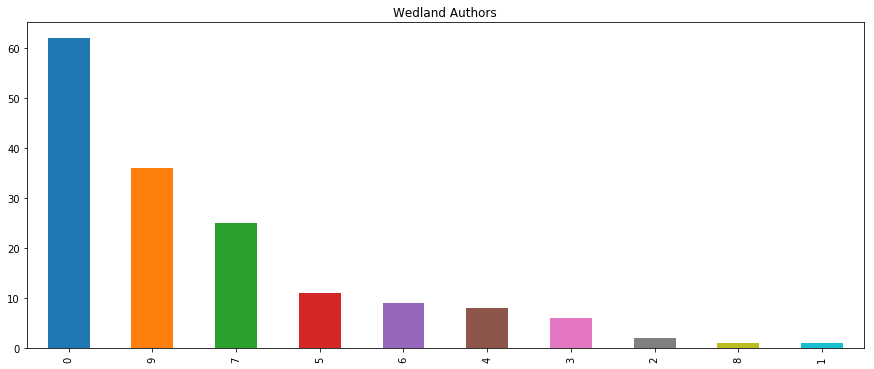

In [94]:
 df['category'].value_counts().head(10).plot(title="Wedland Authors", kind='bar', figsize=(15,6))

In [110]:
inference = []

In [111]:
from pprint import pprint
for i in range(len(dataframe)):
    sim = model.docvecs.most_similar(positive=[dataframe['name'][i]], topn=1)
    print("{}: {}, {}".format(dataframe['name'][i], sim[0][0], sim[0][1]))
    inference.append({'_original': dataframe['name'][i], 'closest historian': sim[0][0], 'cosine': sim[0][1]})

Adler, Bruno: Heise, Carl Georg, 0.9775944352149963
Antal, Frederick: Planiscig, Leo, 0.5580251216888428
Arnheim, Rudolf: RaphaÌÇl, Max, 0.6081061363220215
Auerbach, Erna: Eisner, Lotte H., 0.8629709482192993
Auerbach, Ingeborg Any: Foerster, Lotte Brand, 0.7880510091781616
Bachhofer, Ludwig: Rosenthal, Gertrude, 0.8917782306671143
Badt, Kurt: Roh, Franz, 0.6970230340957642
Balet, Leo: Hildebrandt, Hans, 0.9622777700424194
Baum, Julius : Berger, Klaus, 0.6757491230964661
Benesch, Heinrich: Weinberger, Martin, 0.8157191872596741
Benesch, Otto: MÌ_nz, Ludwig, 0.7401652336120605
Berger, Klaus: Mayer, August Liebmann, 0.7115643620491028
Berliner, Rudolf: Lehmann, Henri, 0.7239909172058105
Bernett, Frederick A.: Hoeltje, Georg, 0.9752639532089233
Bernheimer, Richard: Gaertner, Johannes A., 0.721325159072876
Bier, Justus: Kurth, Betty, 0.7938756942749023
Bing, Gertrud: Goldschneider, Ludwig, 0.7200589179992676
Born, Wolfgang: Planiscig, Leo, 0.6302240490913391
Breitenbach, Edgar: Dussler, Lu

/usr/local/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


TypeError: '<' not supported between instances of 'str' and 'int'

In [112]:
trial = pd.DataFrame(inference)

In [113]:
trial_sorted = trial.sort_values(by=['cosine'], ascending=False)

In [114]:
trial_sorted.head(322)

,_original,closest historian,cosine
24,"Buschbeck, Ernst Heinrich","Hildebrandt, Hans",0.979722
0,"Adler, Bruno","Heise, Carl Georg",0.977594
13,"Bernett, Frederick A.","Hoeltje, Georg",0.975264
26,"Cohn-Wiener, Ernst","Buschbeck, Ernst Heinrich",0.972803
38,"Fischel, Oskar","Gramberg, Werner",0.967364
29,"Curjel, Hans","Hildebrandt, Hans",0.966741
33,"Dresdner, Albert","Cohn-Wiener, Ernst",0.963246
7,"Balet, Leo","Hildebrandt, Hans",0.962278
31,"Deri, Max","Moses, Elizabeth",0.926899
25,"Cohen, Walter","Freund, Karl",0.919707


In [115]:
trial_sorted.to_csv('for_gephi.csv')

In [30]:
people = []

In [31]:
for index, row in dataframe.iterrows():
    for pep in row['entities']:
        if pep.label_ == 'PERSON':
            people.append({'person': pep})

In [46]:
trial = pd.DataFrame(people)
trial.head

<bound method NDFrame.head of                         person
0              (Alajos, Antal)
1              (Sofia, Gerstl)
2                      (Antal)
3     (Heinrich, Wí_lfflin</a)
4          (Max, Dvoríçk</a>.)
5                   (Johannes)
6             (Georg, Lukíçcs)
7             (Karl, Mannheim)
8                     (Arnold)
9               (Vorsitzender)
10        (Otto, Benesch</a>.)
11                 (Partially)
12     (Theodora, von, Lobell)
13             (Bruno, Fí_rst)
14       (Anthony, Blunt</a>.)
15            (Evelyn, Foster)
16      (Florentine, Painting)
17         (A., E., Popham</a)
18                     (Antal)
19                     (Antal)
20                       (Aby)
21                     (Antal)
22           (John, Berger</a)
23                     (Louis)
24                     (Blunt)
25                   (Arnheim)
26            (Georg, Arnheim)
27            (Betty, Gutherz)
28                   (Arnheim)
29                   (Arnheim)
...      

In [44]:
places_df = pd.DataFrame([{'name': place[0]} for place in trial['person']])

In [45]:
places_df

,name
0,Alajos
1,Sofia
2,Antal
3,Heinrich
4,Max
5,Johannes
6,Georg
7,Karl
8,Arnold
9,Vorsitzender
